In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

In [31]:
tf.__version__

'1.4.0'

In [32]:
observation = 1000

x1 = np.random.uniform(low = -10, high=10, size=[observation,1])
x2 = np.random.uniform(-10,10,[observation,1])

gen_input =np.column_stack((x1, x2))

noice = np.random.uniform(-1,1,[observation,1])
 
gen_target = 2*x1 - 3*x2 + 7 + noice
np.savez("TF_genDATA",inputs =gen_input,targets =gen_target) 


# Outling the model

In [33]:
input_size =2
op_size = 1

inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, op_size])

weights = tf.Variable(tf.random_uniform([input_size, op_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([op_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs,weights) + biases

# Loss and GD

In [39]:
loss = tf.losses.mean_squared_error(targets, outputs)/2.
optimizer =tf.train.GradientDescentOptimizer(learning_rate= 0.05).minimize(loss)

# prepare for execution

In [40]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()
sess.run(initializer)

In [46]:
training_data = np.load("TF_genDATA.npz")

In [47]:
for e in range(100):
    _, curr_loss =sess.run([optimizer,loss],
                          feed_dict={inputs:training_data["inputs"],targets:training_data["targets"]})
    print(curr_loss)

2.169578
1.9746025
1.798894
1.6404216
1.4974456
1.3684276
1.2519976
1.1469235
1.0520954
0.9665139
0.8892766
0.8195694
0.75665843
0.69988114
0.6486395
0.60239345
0.5606562
0.522988
0.48899293
0.458312
0.43062225
0.40563196
0.3830784
0.36272332
0.344353
0.3277737
0.31281054
0.29930654
0.28711897
0.27611968
0.26619288
0.25723365
0.24914804
0.24185058
0.23526473
0.22932103
0.22395669
0.2191154
0.21474612
0.21080291
0.20724402
0.20403217
0.20113349
0.19851728
0.1961562
0.19402534
0.19210224
0.1903666
0.18880025
0.18738665
0.18611075
0.18495929
0.18391998
0.18298212
0.18213567
0.18137181
0.1806823
0.18006012
0.17949854
0.1789918
0.17853433
0.17812152
0.17774893
0.17741275
0.17710926
0.17683542
0.17658824
0.17636517
0.17616384
0.17598212
0.17581809
0.17567013
0.17553656
0.17541602
0.17530717
0.17520906
0.17512044
0.17504044
0.1749683
0.17490315
0.1748443
0.17479129
0.17474338
0.17470017
0.17466119
0.17462593
0.17459425
0.17456555
0.17453967
0.17451629
0.17449526
0.17447619
0.17445904
0.174443

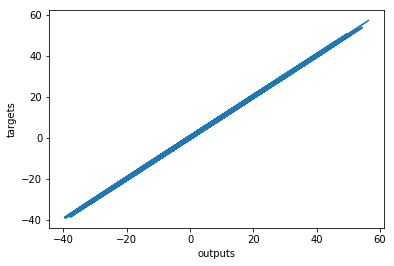

In [48]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()